In [1]:
import datetime
import import_ipynb
import importlib
import matplotlib
import numpy
import pandas
import yfinance as yf

import Analytics
importlib.reload(Analytics)
from Analytics import Simple_Moving_Average 
from Analytics import Simple_Moving_Average_20Day
from Analytics import Relative_Strength_Index
from Analytics import Standard_Deviation
from Analytics import Bandwidth
from Analytics import Rate_Of_Change
from Analytics import Rate_Of_Change_20Day
from matplotlib import pyplot
from pandas_datareader import data as pdr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


# Override yFinance with Pandas
yf.pdr_override() # <-- Here is the fix

importing Jupyter notebook from Analytics.ipynb
importing Jupyter notebook from Analytics.ipynb


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
def train_model(model, ticker):

    # Set start and end dates
    start_date = datetime.datetime(2010, 1, 1)
    end_date   = datetime.date.today()

    # Grab data
    data = pdr.get_data_yahoo(str(ticker), start = start_date, end = end_date)
    
    # Run Analytics
    X, Y = build_training_set(data)
    
    model.fit(X, Y)
    
    return model

In [37]:
def build_training_set(data):
#    print (data.head())
    data = data.values
    closing_prices = scale_data(data[:, 3])
    closing_prices_5_day = closing_prices[5:]
#    print (closing_prices[0:10])
    
    # Calculate Analytics
    SMA = Simple_Moving_Average(closing_prices)
    SMA20 = Simple_Moving_Average_20Day(closing_prices)
    RSI = Relative_Strength_Index(closing_prices)
    STD = Standard_Deviation(closing_prices)
    BW = Bandwidth(closing_prices, STD)
    ROC = Rate_Of_Change(closing_prices)
    ROC100 = Rate_Of_Change_20Day(closing_prices)
    
    # Trim Data
    # Trim the first 20 entries because ROC20 is all zeros
    # Trim the last 5 entries from everything except closing_prices_5_day
    SMA = SMA[20:-5]
    SMA20 = SMA20[20:-5]
    RSI = RSI[20:-5]
    STD = STD[20:-5]
    BW = BW[20:-5]
    ROC = ROC[20:-5]
    ROC100 = ROC100[20:-5]
    closing_prices = closing_prices[20:-5]
    closing_prices_5_day = closing_prices_5_day[20:]
    
    
    # Reshape Data
    SMA = numpy.reshape(SMA, (len(SMA), 1))
    SMA20 = numpy.reshape(SMA20, (len(SMA20), 1))
    RSI = numpy.reshape(RSI, (len(RSI), 1))
    STD = numpy.reshape(STD, (len(STD), 1))
    BW = numpy.reshape(BW, (len(BW), 1))
    ROC = numpy.reshape(ROC, (len(ROC), 1))
    ROC100 = numpy.reshape(ROC100, (len(ROC100), 1))
    closing_prices = numpy.reshape(closing_prices, (len(closing_prices), 1))
    closing_prices_5_day = numpy.reshape(closing_prices_5_day, (len(closing_prices_5_day), 1))
    

#    print(SMA.shape)
#    print(SMA20.shape)
#    print(RSI.shape)
#    print(STD.shape)    
#    print(BW.shape)
#    print(ROC.shape)    
#    print(ROC100.shape)    
#    print(closing_prices.shape)    
#    print(closing_prices_5_day.shape)    
    
    
    
    X = numpy.concatenate((SMA, SMA20, RSI, STD, BW, ROC, ROC100, closing_prices), axis = 1)
    Y = closing_prices_5_day
    
    X, x_dont_use, Y, y_dont_use = train_test_split(X, Y, test_size=.001, random_state=12)

#    print(X.shape)
#    print(Y.shape)
    
    return X, Y

In [38]:
def build_test_data(StockTickers):
    # Main Data table with all tickers in it
    test_data = []
    
    # Always start from Jan 1, 2010 so we have at least 10 years of data.
    start_date = datetime.datetime(2010, 1, 1)
    end_date   = datetime.date.today()
    
    for ticker in StockTickers:
        StockData = pdr.get_data_yahoo(str(ticker), start = start_date, end = end_date)

        data = StockData.values
        closing_prices = scale_data(data[:, 3])
        closing_prices_5_day = closing_prices[5:]
        
    
        # Calculate Analytics
        SMA = Simple_Moving_Average(closing_prices)
        SMA20 = Simple_Moving_Average_20Day(closing_prices)
        RSI = Relative_Strength_Index(closing_prices)
        STD = Standard_Deviation(closing_prices)
        BW = Bandwidth(closing_prices, STD)
        ROC = Rate_Of_Change(closing_prices)
        ROC100 = Rate_Of_Change_20Day(closing_prices)
    
        # Trim Data
        # Trim the first 20 entries because ROC20 is all zeros
        # Trim the last 5 entries from everything except closing_prices_5_day
        SMA = SMA[20:-5]
        SMA20 = SMA20[20:-5]
        RSI = RSI[20:-5]
        STD = STD[20:-5]
        BW = BW[20:-5]
        ROC = ROC[20:-5]
        ROC100 = ROC100[20:-5]
        closing_prices = closing_prices[20:-5]


        # Reshape Data
        SMA = numpy.reshape(SMA, (len(SMA), 1))
        SMA20 = numpy.reshape(SMA20, (len(SMA20), 1))
        RSI = numpy.reshape(RSI, (len(RSI), 1))
        STD = numpy.reshape(STD, (len(STD), 1))
        BW = numpy.reshape(BW, (len(BW), 1))
        ROC = numpy.reshape(ROC, (len(ROC), 1))
        ROC100 = numpy.reshape(ROC100, (len(ROC100), 1))
        closing_prices = numpy.reshape(closing_prices, (len(closing_prices), 1))
        closing_prices_5_day = numpy.reshape(closing_prices_5_day, (len(closing_prices_5_day), 1))
    
    
    
        X = numpy.concatenate((SMA, SMA20, RSI, STD, BW, ROC, ROC100, closing_prices), axis = 1)
        
        if (len(test_data) == 0):
            test_data = X
            
        else:
            test_data = numpy.concatenate((test_data, X), axis = 1)
        
        print(test_data.shape)
        
    return test_data
    

In [39]:
def build_test_data_unscaled (StockTickers):
    # Main Data table with all tickers in it
    test_data = []
    
    # Always start from Jan 1, 2010 so we have at least 10 years of data.
    start_date = datetime.datetime(2010, 1, 1)
    end_date   = datetime.date.today()
    
    for ticker in StockTickers:
        StockData = pdr.get_data_yahoo(str(ticker), start = start_date, end = end_date)

        data = StockData.values
        closing_prices = data[:, 3]
        closing_prices_5_day = closing_prices[5:]
        
    
        # Calculate Analytics
        SMA = Simple_Moving_Average(closing_prices)
        SMA20 = Simple_Moving_Average_20Day(closing_prices)
        RSI = Relative_Strength_Index(closing_prices)
        STD = Standard_Deviation(closing_prices)
        BW = Bandwidth(closing_prices, STD)
        ROC = Rate_Of_Change(closing_prices)
        ROC100 = Rate_Of_Change_20Day(closing_prices)
    
        # Trim Data
        # Trim the first 20 entries because ROC20 is all zeros
        # Trim the last 5 entries from everything except closing_prices_5_day
        SMA = SMA[20:-5]
        SMA20 = SMA20[20:-5]
        RSI = RSI[20:-5]
        STD = STD[20:-5]
        BW = BW[20:-5]
        ROC = ROC[20:-5]
        ROC100 = ROC100[20:-5]
        closing_prices = closing_prices[20:-5]


        # Reshape Data
        SMA = numpy.reshape(SMA, (len(SMA), 1))
        SMA20 = numpy.reshape(SMA20, (len(SMA20), 1))
        RSI = numpy.reshape(RSI, (len(RSI), 1))
        STD = numpy.reshape(STD, (len(STD), 1))
        BW = numpy.reshape(BW, (len(BW), 1))
        ROC = numpy.reshape(ROC, (len(ROC), 1))
        ROC100 = numpy.reshape(ROC100, (len(ROC100), 1))
        closing_prices = numpy.reshape(closing_prices, (len(closing_prices), 1))
        closing_prices_5_day = numpy.reshape(closing_prices_5_day, (len(closing_prices_5_day), 1))
    
    
    
        X = numpy.concatenate((SMA, SMA20, RSI, STD, BW, ROC, ROC100, closing_prices), axis = 1)
        
        if (len(test_data) == 0):
            test_data = X
            
        else:
            test_data = numpy.concatenate((test_data, X), axis = 1)
        
        print(test_data.shape)
        
    return test_data

In [36]:
def scale_data(data):
    return scale(data)
    #return data

In [6]:
#StockTickers = ['AAPL', 'MSFT', 'VZ', 'GOOG', 'UPS']
#test_data = build_test_data (StockTickers)
#len(test_data)

In [25]:
# # Test Code

# start_date = datetime.datetime(2010, 1, 1)
# end_date   = datetime.date.today()

# data = pdr.get_data_yahoo(str('AAPL'), start = start_date, end = end_date)
    
# data = scale_data(data)
    
# # Run Analytics
# X, Y = build_training_set(data)

In [10]:
#data.shape

(2636, 6)

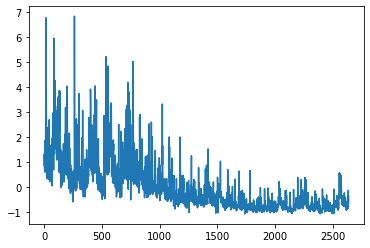

In [20]:
#pyplot.plot(data[:, 5])